In [ ]:
name_file = '2011kmp.txt'
with open(name_file, 'r') as open_file:
    file_as_string = open_file.read().lower() 
   

In [ ]:

with open('2009kmp.txt', 'r') as open_file:
    file_as_string_09 = open_file.read().lower()
with open('2010kmp.txt', 'r') as open_file:
   file_as_string_10 = open_file.read().lower() 
with open('2011kmp.txt', 'r') as open_file:
    file_as_string_11 = open_file.read().lower() 
with open('2012kmp.txt', 'r') as open_file:
    file_as_string_12 = open_file.read().lower() 
with open('2013kmp.txt', 'r') as open_file:
    file_as_string_13 = open_file.read().lower() 
with open('2014kmp.txt', 'r') as open_file:
    file_as_string_14 = open_file.read().lower() 
with open('kmp2015.txt', 'r') as open_file:
    file_as_string_15 = open_file.read().lower() 
with open('kmp2016.txt', 'r') as open_file:
    file_as_string_16 = open_file.read().lower() 
with open('kmp2017.txt', 'r') as open_file:
    file_as_string_17 = open_file.read().lower() 
with open('kmp2018.txt', 'r') as open_file:
    file_as_string_18 = open_file.read().lower() 
with open('kmp2019.txt', 'r') as open_file:
    file_as_string_19 = open_file.read().lower() 
with open('kmp2020.txt', 'r') as open_file:
    file_as_string_20 = open_file.read().lower() 
with open('kmp2021.txt', 'r') as open_file:
    file_as_string_21 = open_file.read().lower() 

In [ ]:
from nltk.tokenize import word_tokenize
from nltk import download
download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
all_data=[file_as_string_09,file_as_string_10,file_as_string_11,file_as_string_12,file_as_string_13,file_as_string_14,file_as_string_15,file_as_string_16,file_as_string_17,file_as_string_18,file_as_string_19,file_as_string_20,file_as_string_21]

In [ ]:
from collections import Counter

In [ ]:
all_tokens=[]
for item in all_data:
  all_tokens.append(word_tokenize(item))

In [ ]:
all_clean=[]
for item in all_tokens:
  all_clean.append([word for word in item if word[0].isalpha() or word.isnumeric()])


In [ ]:
file_age = []
age_words = ['лет', 'года', '-летний'],
age_words_before = ['исполнилось','мне']
age_words_after = ['см','м','кг']
for j in range(0,len(all_clean)):
  file_age.append([int(all_clean[j][i]) for i in range(0,len(all_clean[j])-1) \
            if all_clean[j][i].isnumeric() and \
            (all_clean[j][i+1] in age_words  \
             or all_clean[j][i-1] in age_words_before)\
             and all_clean[j][i-2] != 'когда' and 
             all_clean[j][i+1] not in age_words_after])
file_age[0]

[20, 19, 18, 23]

In [ ]:
download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
with open('stopwords.txt', 'r') as stop_list_file:
    stop_list_as_list = stop_list_file.readlines() 
stop_words_kmp_1 = [line.strip() for line in stop_list_as_list]

In [ ]:
stop_words = stopwords.words('russian') 
stop_words_kmp_2 = ['пристрелите','пмп','это','пожалуйста','кмп','мой','свой','просто']
stop_words = stop_words_kmp_1 + stop_words + stop_words_kmp_2

all_clean2=[]
for item in all_clean:
  all_clean2.append([word for word in item if word not in stop_words])


In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 55 kB 3.2 MB/s 
     |████████████████████████████████| 8.2 MB 11.2 MB/s 


In [ ]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()

In [ ]:
all_lemmatized=[]
for item in all_clean2:
  all_lemmatized.append([morph.parse(word)[0].normal_form for word in item])


In [ ]:
all_final=[]
for item in all_lemmatized:
  all_final.append(Counter(item).most_common())


In [ ]:
all_final[0][:20]

[('девушка', 21),
 ('дом', 17),
 ('деньга', 14),
 ('ребёнок', 12),
 ('оказаться', 11),
 ('глаз', 11),
 ('врач', 11),
 ('звонить', 10),
 ('взять', 10),
 ('жить', 10),
 ('работа', 10),
 ('жена', 9),
 ('красивый', 9),
 ('пойти', 9),
 ('волос', 9),
 ('парень', 9),
 ('квартира', 9),
 ('родитель', 9),
 ('время', 9),
 ('грудь', 9)]

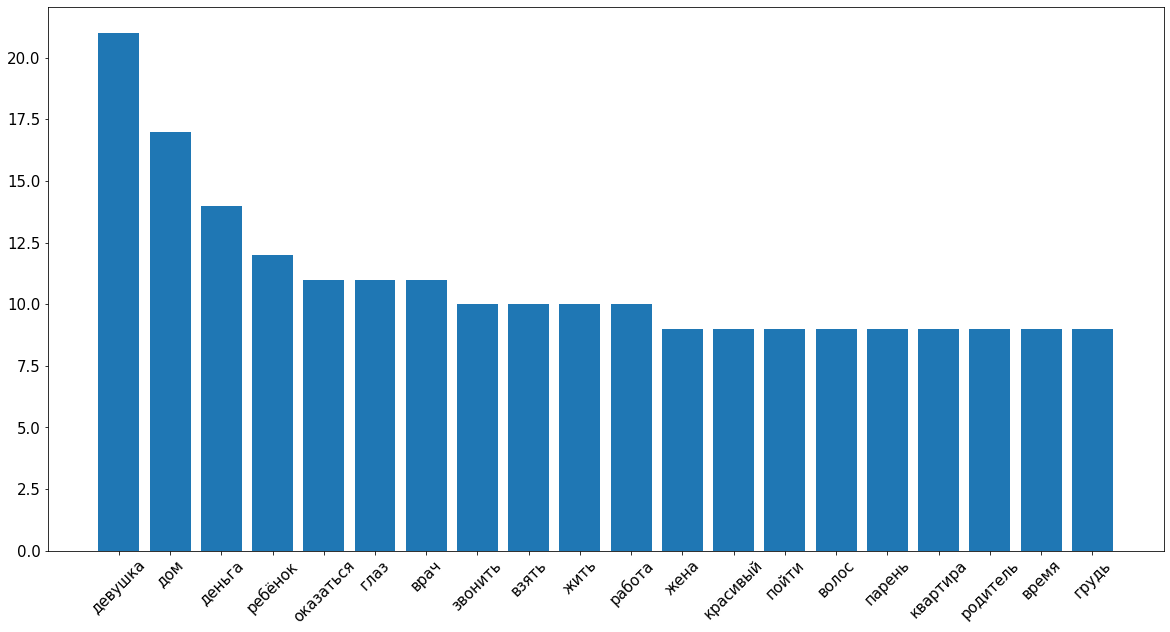

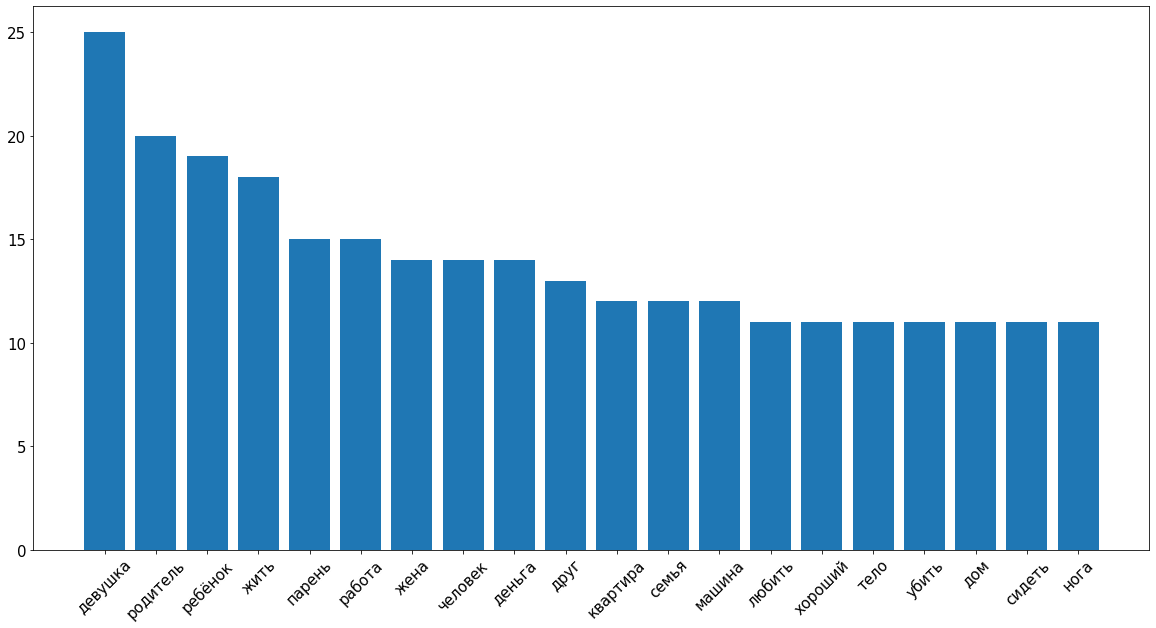

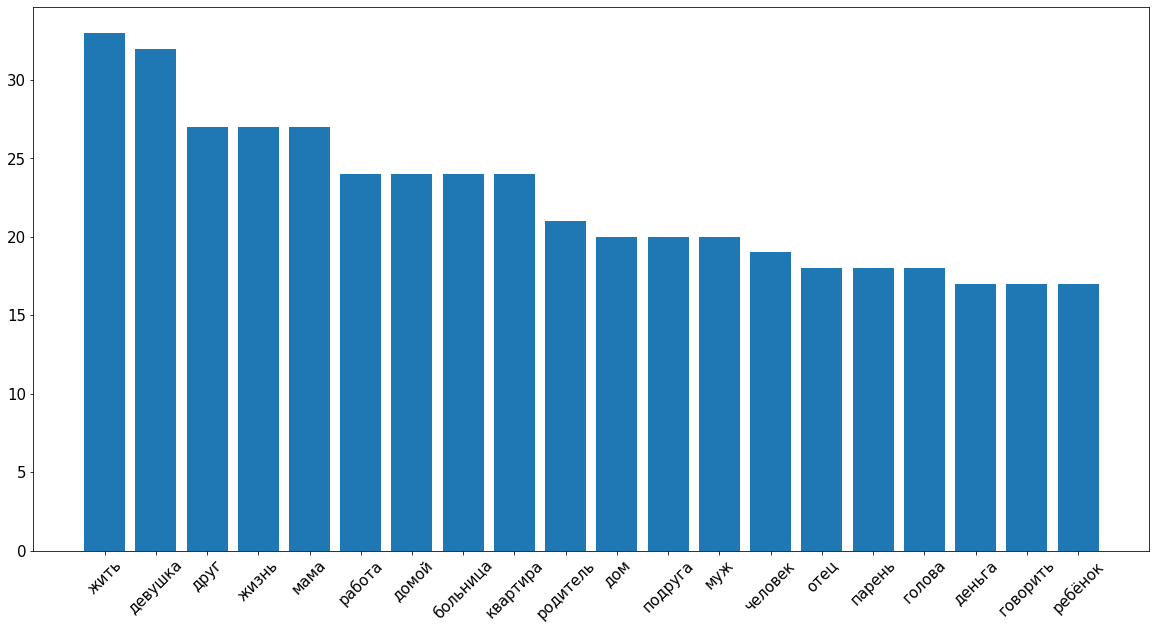

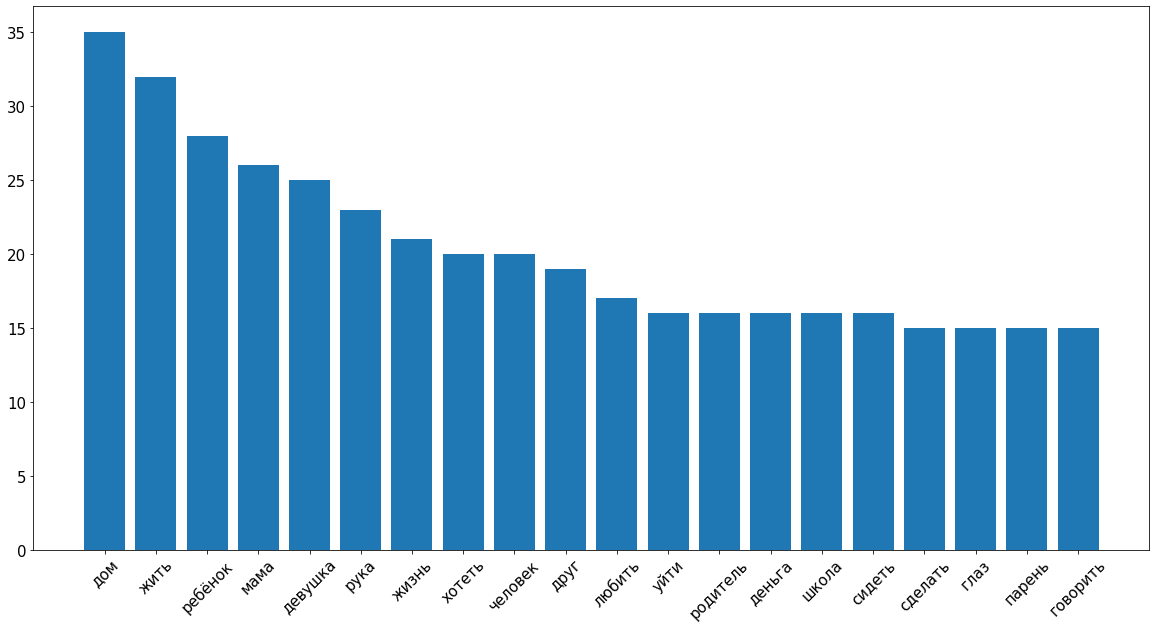

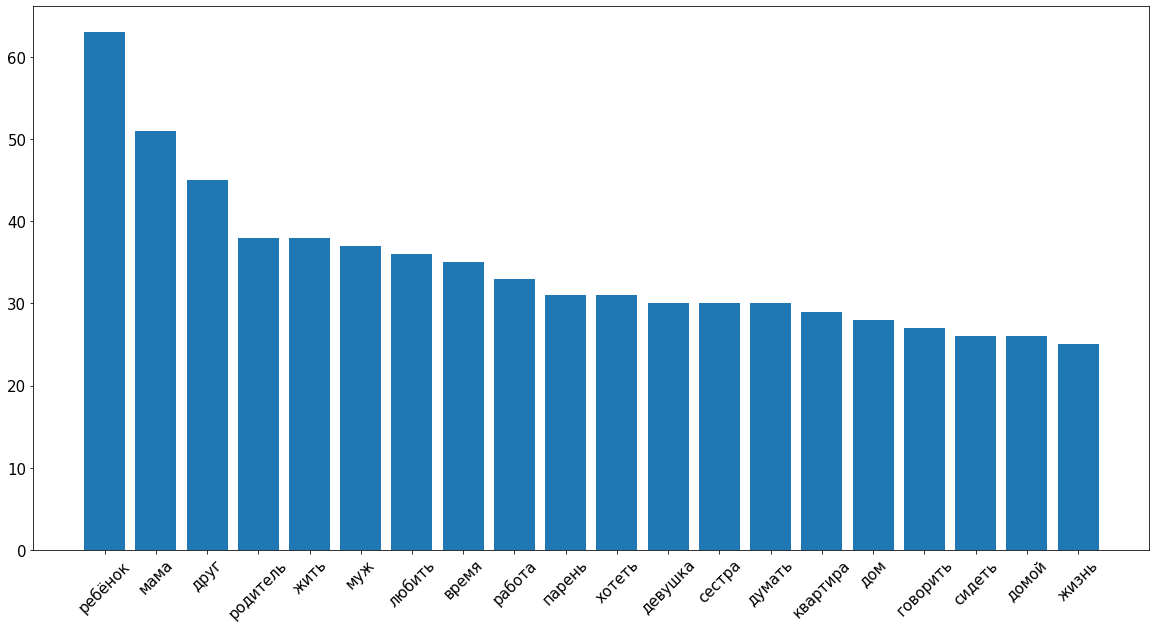

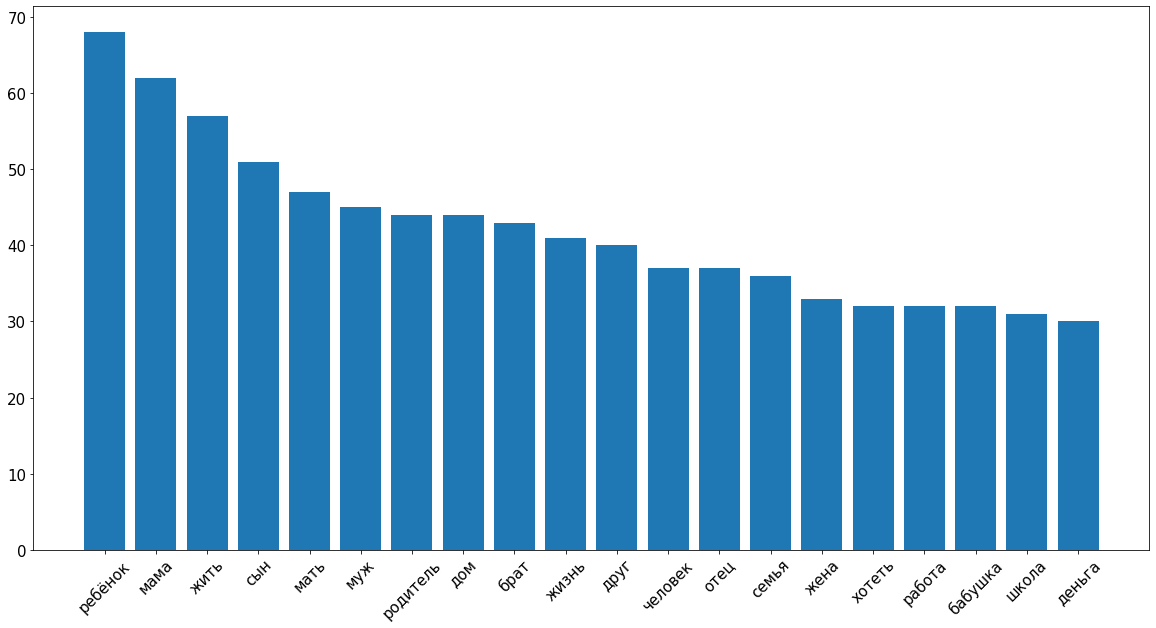

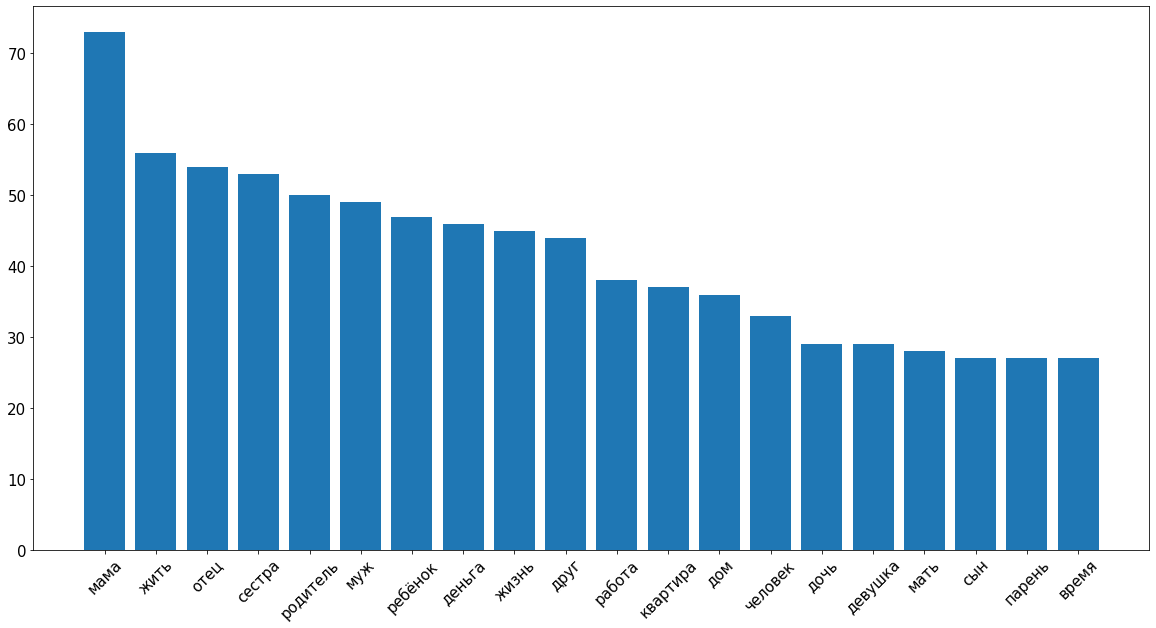

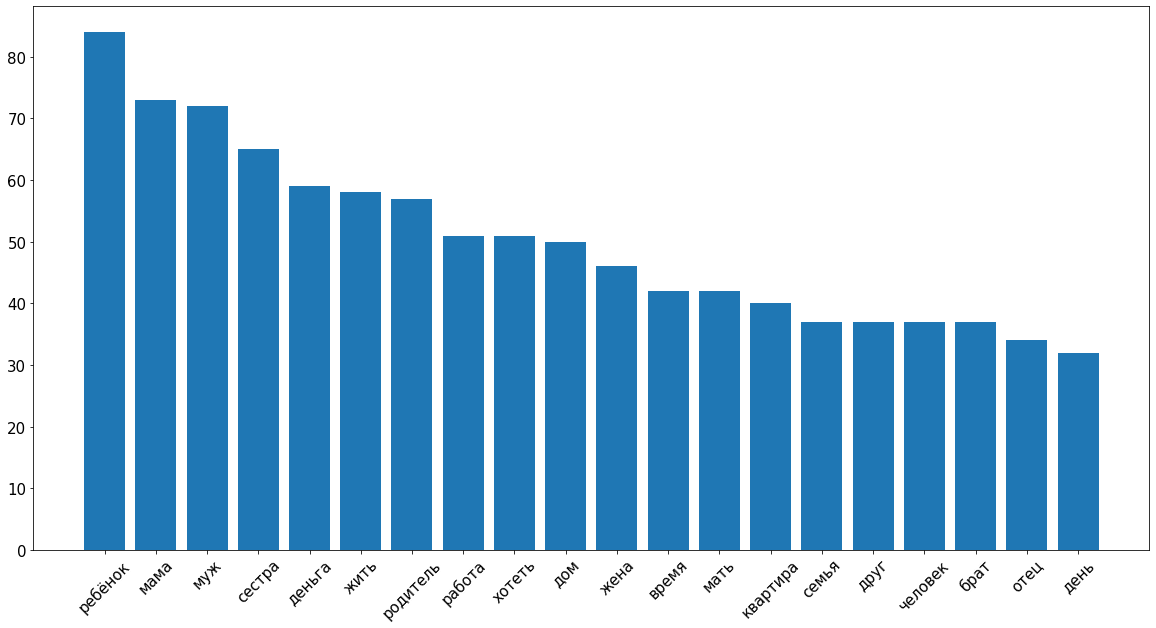

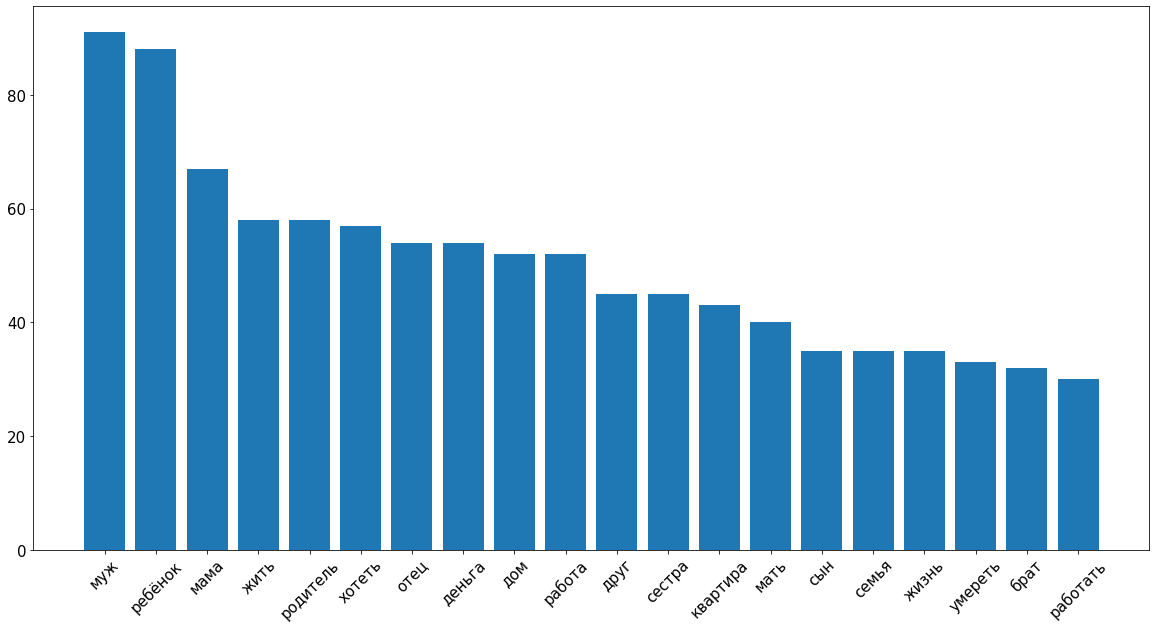

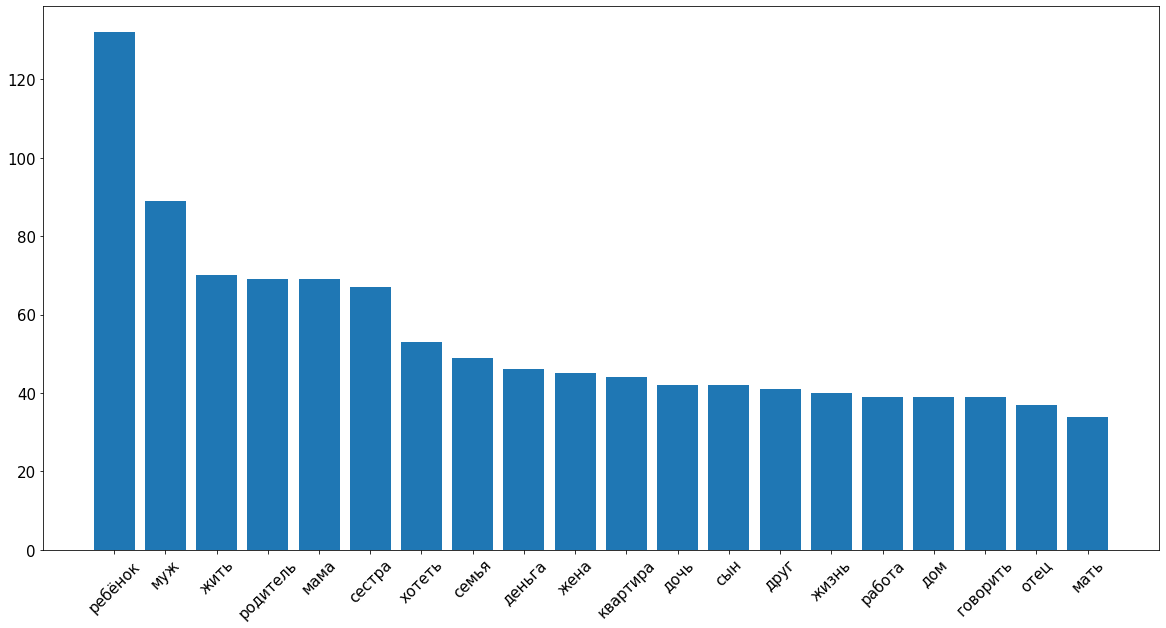

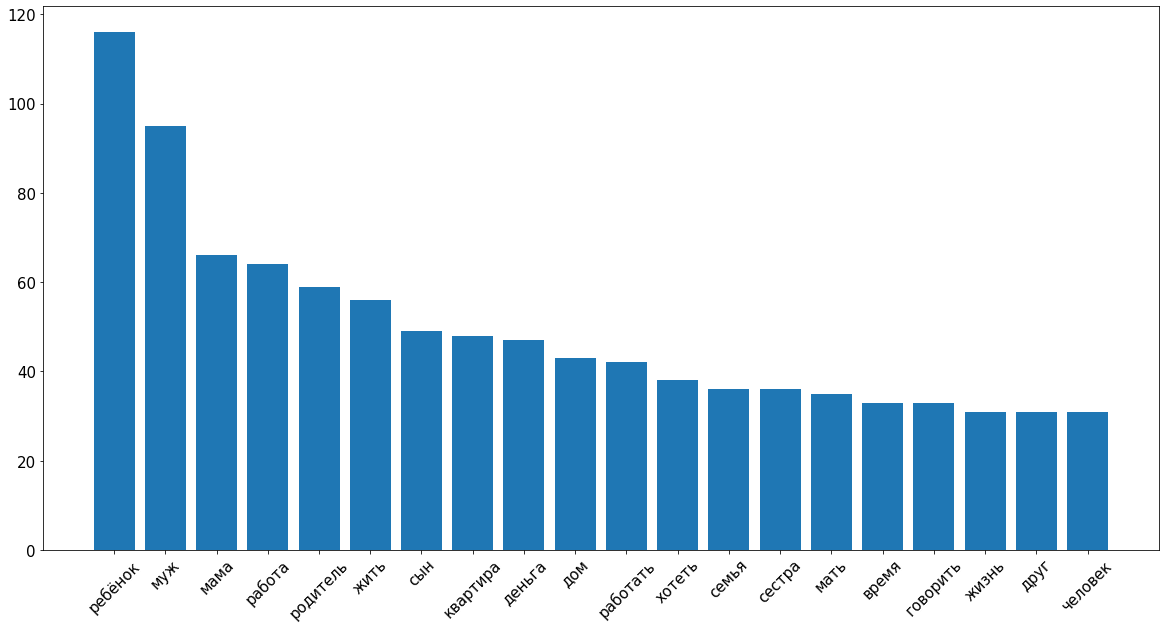

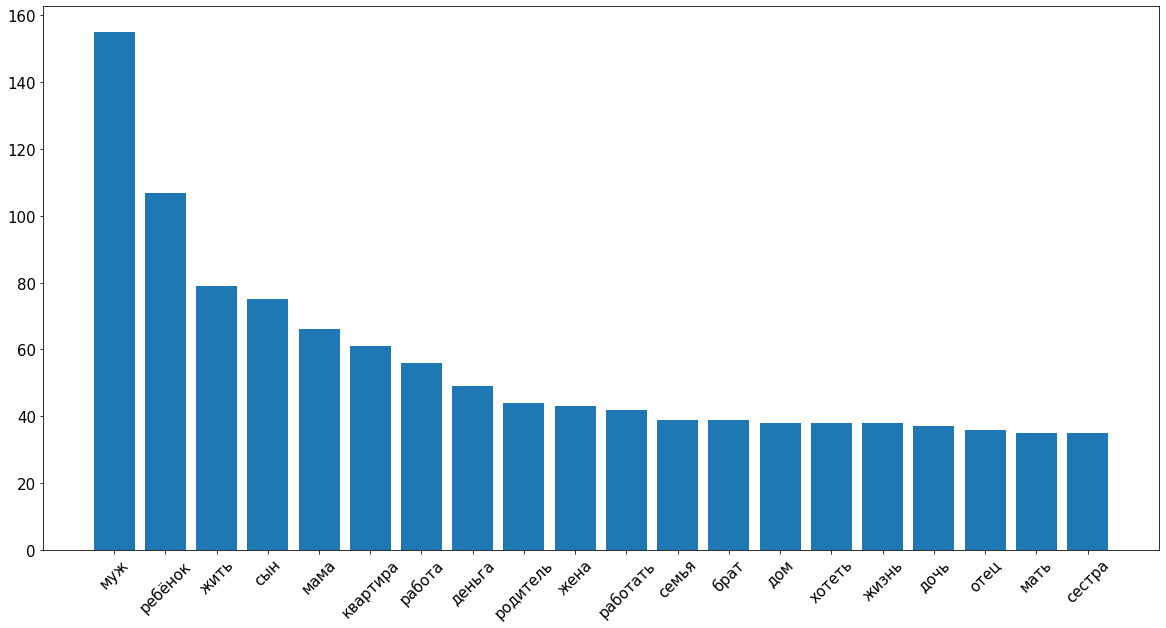

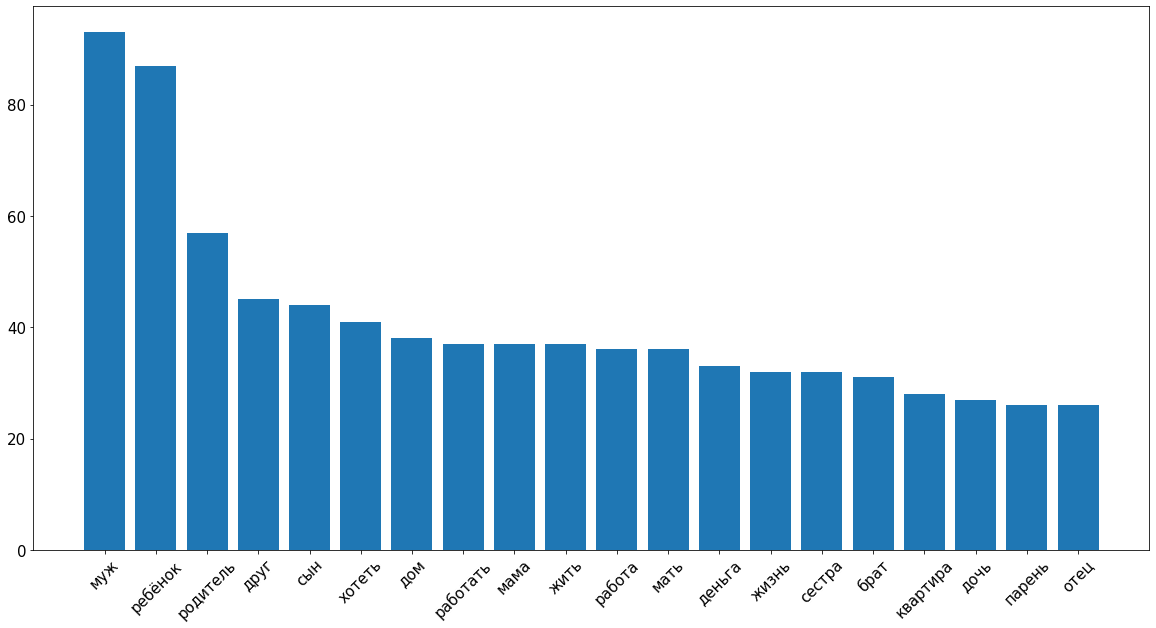

In [ ]:
import matplotlib.pyplot as plt 

for item in all_final:
  values = [pair[1] for pair in item[:20]] 
  labels = [pair[0] for pair in item[:20]]

  plt.figure(figsize=(20, 10))
  
  plt.xticks(rotation=45, size = 15)
  plt.yticks(size = 15)
  plt.bar(labels, values) 
  plt.show()
  plt.close('all')

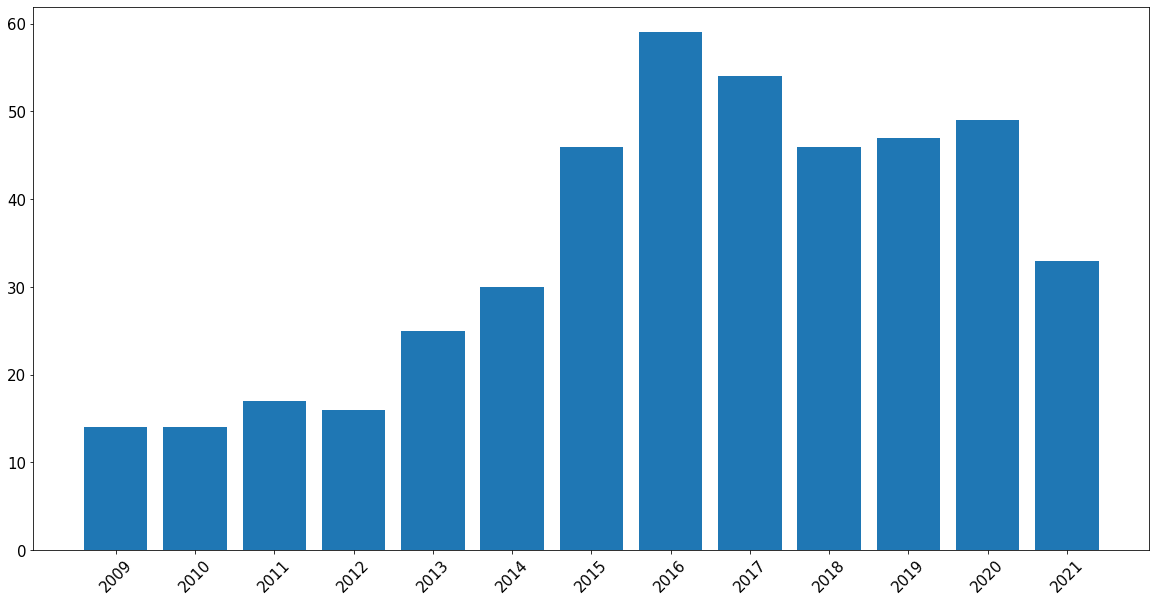

In [ ]:
values =[]
for item in all_final:
  values.append(dict(item)['деньга']) # создаем список с циферками частотностей
labels = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] # создаем список со словами в том же порядке


  ## тут просто всякие параметры отрисовки
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
plt.bar(labels, values) # запихиваем данные в отрисовщик барчартов

plt.show()
plt.close('all')

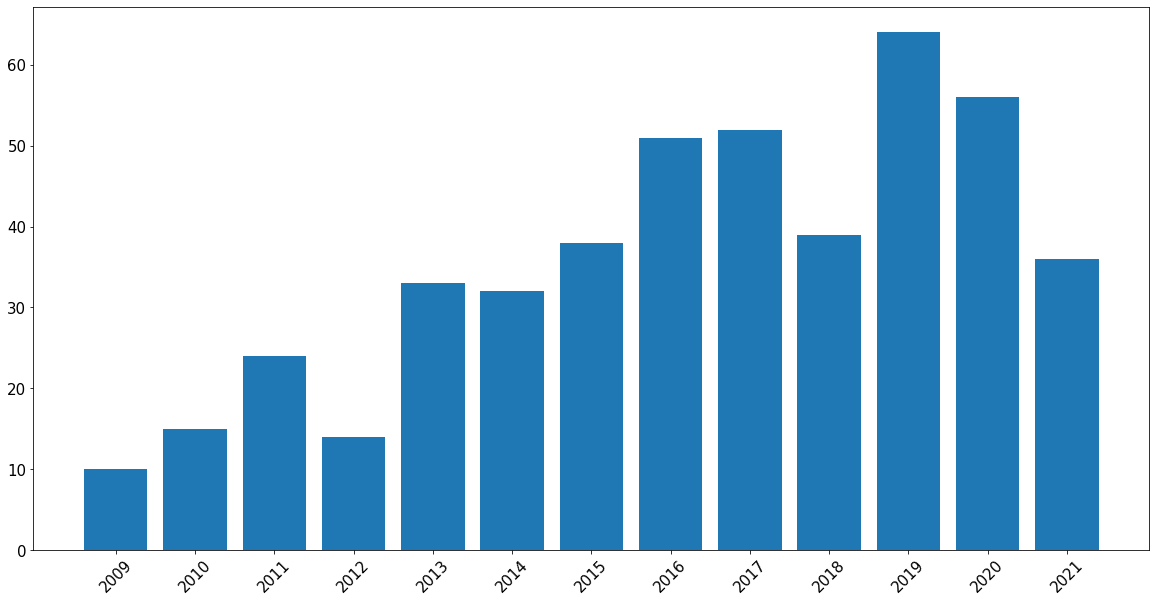

In [ ]:
values =[]
for item in all_final:
  values.append(dict(item)['работа']) # создаем список с циферками частотностей
labels = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] # создаем список со словами в том же порядке


  ## тут просто всякие параметры отрисовки
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
plt.bar(labels, values) # запихиваем данные в отрисовщик барчартов

plt.show()
plt.close('all')

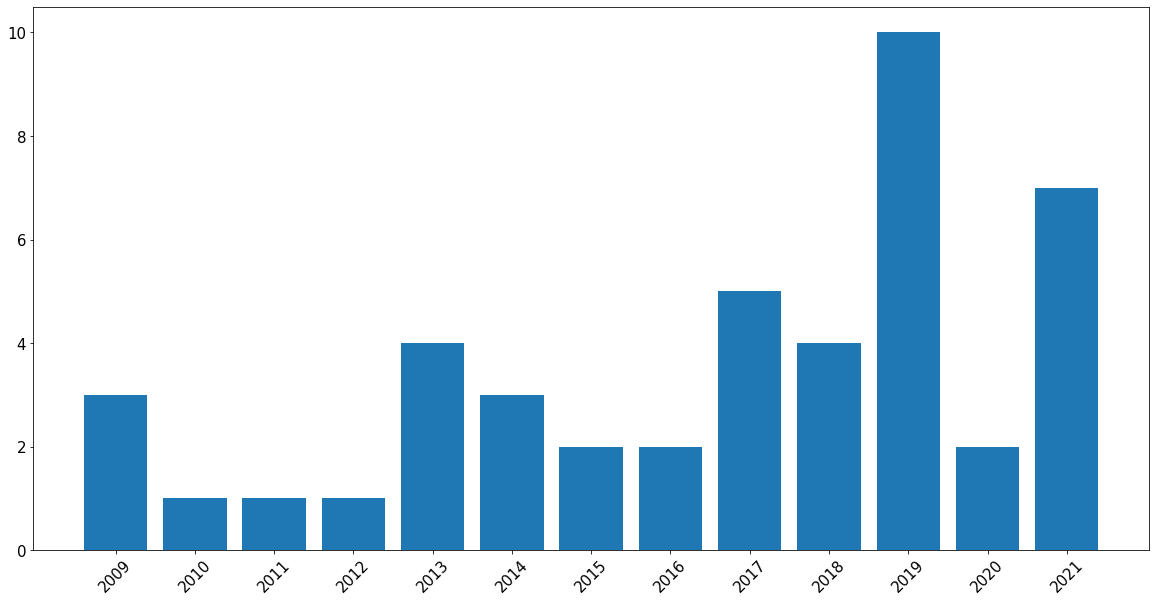

In [ ]:
values =[]
for item in all_final:
  values.append(dict(item)['болезнь']) # создаем список с циферками частотностей
labels = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] # создаем список со словами в том же порядке

  ## тут просто всякие параметры отрисовки
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, size = 15)
plt.yticks(size = 15)
plt.bar(labels, values) # запихиваем данные в отрисовщик барчартов

plt.show()
plt.close('all')


NameError: ignored

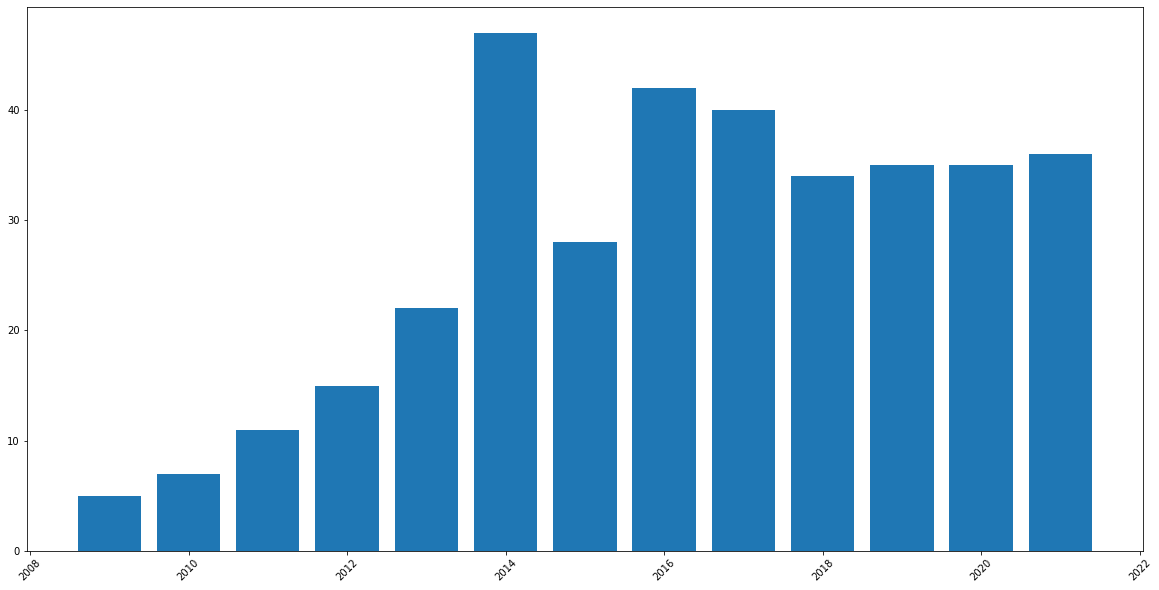

In [ ]:
values =[]
for item in all_final:
  values.append(dict(item)['мать']) # создаем список с циферками частотностей
labels = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021] # создаем список со словами в том же порядке


  ## тут просто всякие параметры отрисовки
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(labels, values)


plt.show()
plt.close('all')

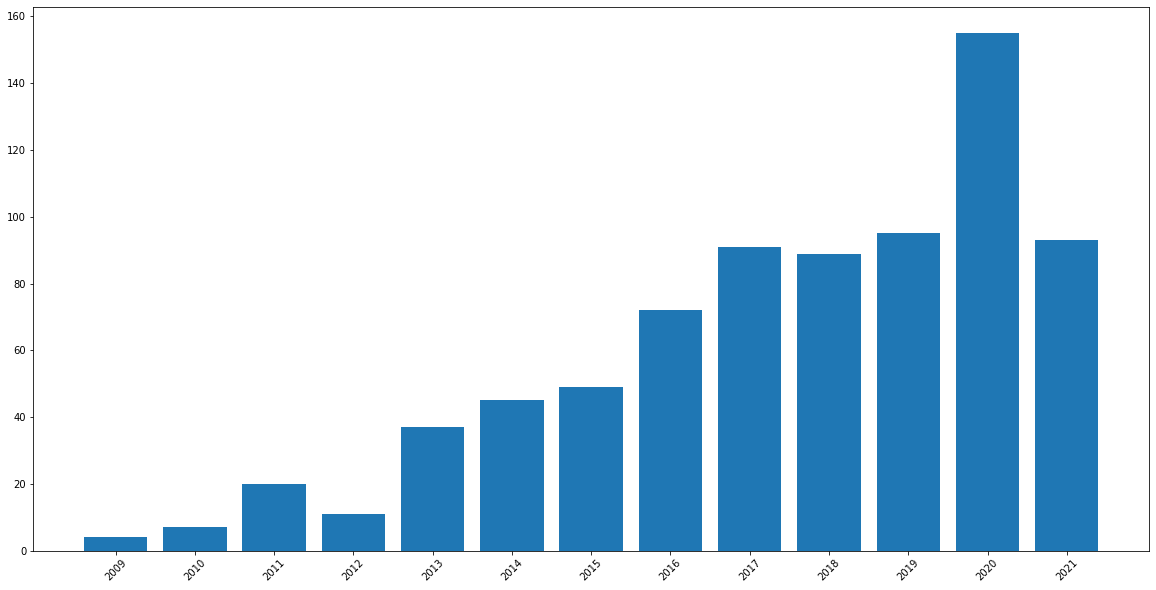

In [ ]:
values =[]
for item in all_final:
  values.append(dict(item)['муж']) 
labels = ['2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'] 


  ## тут просто всякие параметры отрисовки
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(labels, values) # запихиваем данные в отрисовщик барчартов

plt.show()
plt.close('all')

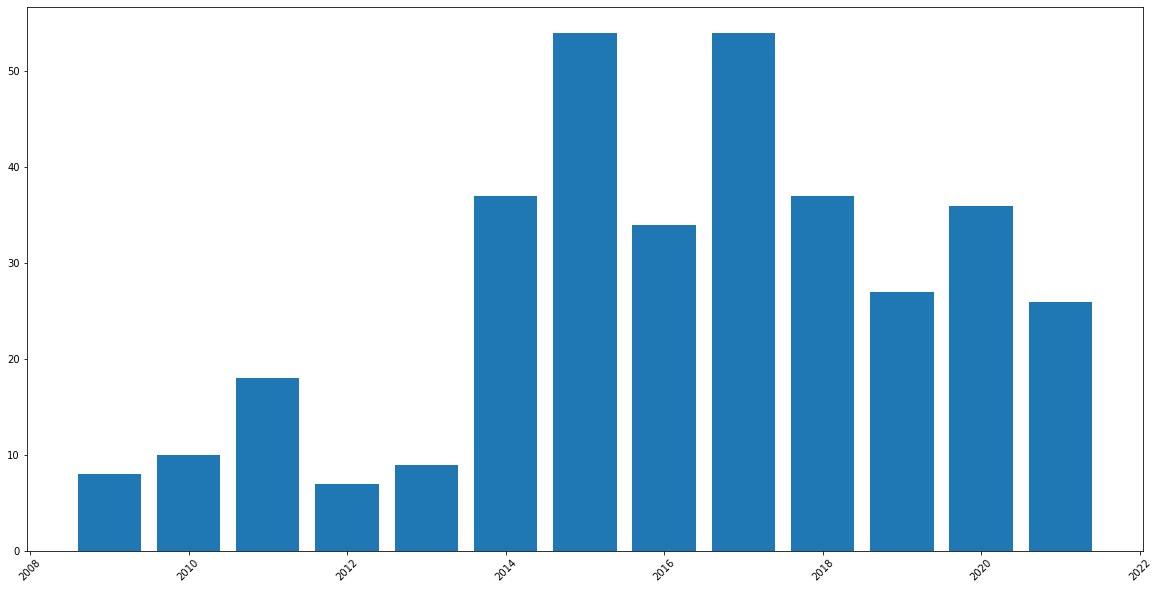

In [ ]:
values =[]
for item in all_final:
  values.append(dict(item)['отец']) # создаем список с циферками частотностей
labels = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021] # создаем список со словами в том же порядке


  ## тут просто всякие параметры отрисовки
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)
plt.bar(labels, values) # запихиваем данные в отрисовщик барчартов

plt.show()
plt.close('all')

In [ ]:
age_gaps={}
for j in range(0,len(file_age)):
  for item in file_age[j]:
    if item in age_gaps:
      age_gaps[item] +=1
    else:
      age_gaps[item] = 1
age_gaps

{2: 1,
 5: 3,
 6: 1,
 12: 1,
 14: 3,
 15: 11,
 16: 8,
 17: 8,
 18: 12,
 19: 10,
 20: 8,
 21: 2,
 22: 6,
 23: 7,
 24: 10,
 25: 11,
 26: 11,
 27: 11,
 28: 8,
 29: 7,
 30: 7,
 31: 2,
 32: 4,
 33: 2,
 34: 2,
 35: 1,
 36: 1,
 38: 1,
 40: 3,
 42: 1,
 43: 3,
 49: 1,
 50: 2,
 52: 1,
 53: 1,
 180: 1}

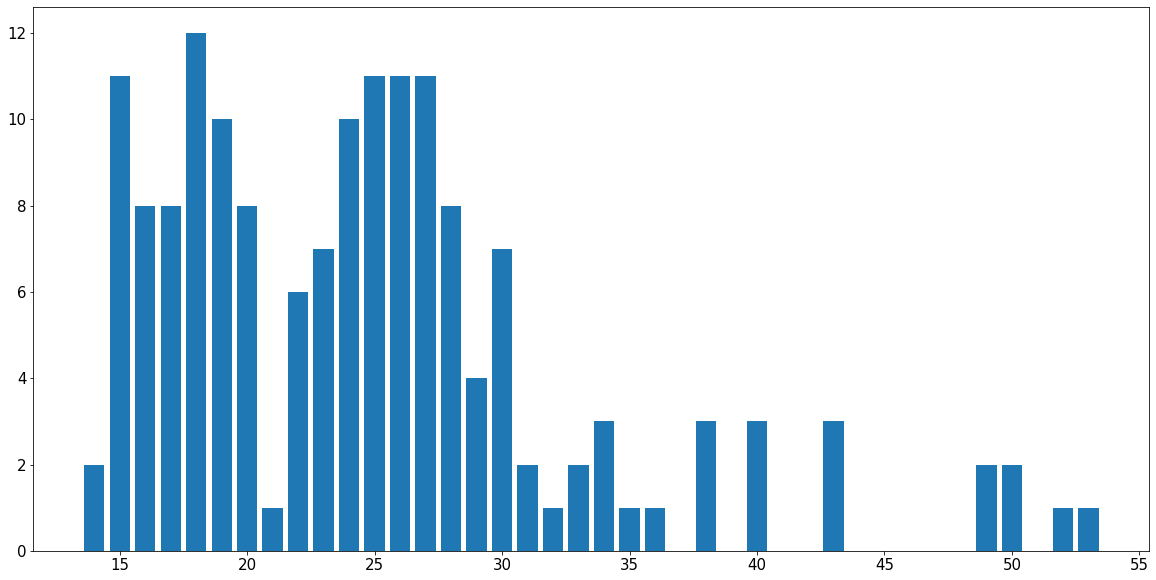

In [ ]:
values = []
labels = []
for item in age_gaps:
  values.append(age_gaps[item]) # создаем список с циферками частотностей
  labels.append(item)  # создаем список со словами в том же порядке
labels.remove(180)
labels.remove(2)
labels.remove(5)
labels.remove(6)
plt.figure(figsize=(20, 10))
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.bar(labels[:30], values[:30]) # запихиваем данные в отрисовщик барчартов

plt.show()
plt.close('all')

  